In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
# Normalize
x_train = x_train / 255
x_test = x_test / 255

In [3]:
np.random.seed(8)
tf.random.set_seed(8)

In [ ]:
model = tf.keras.Sequential()
# Initialize Convolution layers
conv_layer1 = layers.Conv2D(
    64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
)
conv_layer2 = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")
# Initialize Fully connected layers
fc_layer1 = layers.Dense(128, activation="relu")
fc_layer2 = layers.Dense(10, activation="softmax")

model.add(conv_layer1)
model.add(layers.MaxPooling2D(2, 2))
model.add(conv_layer2)
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(fc_layer1)
model.add(fc_layer2)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training
train = model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
1500/1500 - 32s - 21ms/step - accuracy: 0.9584 - loss: 0.1383 - val_accuracy: 0.9853 - val_loss: 0.0506
Epoch 2/5
1500/1500 - 28s - 19ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9863 - val_loss: 0.0449
Epoch 3/5
1500/1500 - 28s - 18ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 4/5
1500/1500 - 27s - 18ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9886 - val_loss: 0.0428
Epoch 5/5
1500/1500 - 26s - 18ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9903 - val_loss: 0.0378


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9868 - loss: 0.0414


[0.033342115581035614, 0.9897000193595886]

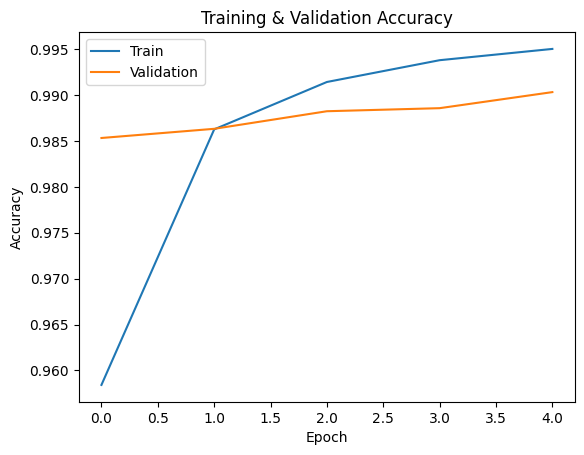

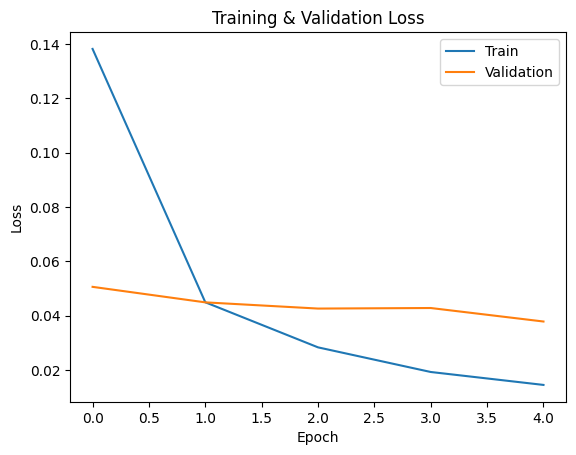

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(train.history["accuracy"])
plt.plot(train.history["val_accuracy"])
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Loss Plot
plt.plot(train.history["loss"])
plt.plot(train.history["val_loss"])
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

### Task 2


In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255

np.random.seed(8)
tf.random.set_seed(8)

In [ ]:
model = tf.keras.Sequential()
# Initialize Convolution layers
conv_layer1 = layers.Conv2D(
    32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)
)
conv_layer2 = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")
# Initialize Fully connected layers
fc_layer1 = layers.Dense(128, activation="relu")
fc_layer2 = layers.Dense(10, activation="softmax")

model.add(conv_layer1)
model.add(layers.MaxPooling2D(2, 2))
model.add(conv_layer2)
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(fc_layer1)
model.add(fc_layer2)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_noaug = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
1250/1250 - 22s - 18ms/step - accuracy: 0.4815 - loss: 1.4387 - val_accuracy: 0.5761 - val_loss: 1.2124
Epoch 2/10
1250/1250 - 18s - 14ms/step - accuracy: 0.6152 - loss: 1.0978 - val_accuracy: 0.6295 - val_loss: 1.0859
Epoch 3/10
1250/1250 - 18s - 14ms/step - accuracy: 0.6669 - loss: 0.9588 - val_accuracy: 0.6390 - val_loss: 1.0502
Epoch 4/10
1250/1250 - 18s - 14ms/step - accuracy: 0.7029 - loss: 0.8554 - val_accuracy: 0.6475 - val_loss: 1.0439
Epoch 5/10
1250/1250 - 18s - 14ms/step - accuracy: 0.7345 - loss: 0.7682 - val_accuracy: 0.6739 - val_loss: 0.9828
Epoch 6/10
1250/1250 - 19s - 15ms/step - accuracy: 0.7617 - loss: 0.6930 - val_accuracy: 0.6830 - val_loss: 0.9817
Epoch 7/10
1250/1250 - 20s - 16ms/step - accuracy: 0.7892 - loss: 0.6165 - val_accuracy: 0.6759 - val_loss: 1.0403
Epoch 8/10
1250/1250 - 18s - 14ms/step - accuracy: 0.8159 - loss: 0.5419 - val_accuracy: 0.6597 - val_loss: 1.1373
Epoch 9/10
1250/1250 - 18s - 14ms/step - accuracy: 0.8379 - loss: 0.4752 - val_a

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6548 - loss: 1.3248


[1.3425768613815308, 0.6507999897003174]

In [ ]:
# Data Augmentation

dataaug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

dataaug.fit(x_train)

In [ ]:
model2 = tf.keras.Sequential()
# Initialize Convolution layers
conv_layer1 = layers.Conv2D(
    32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)
)
conv_layer2 = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")
# Initialize Fully connected layers
fc_layer1 = layers.Dense(128, activation="relu")
fc_layer2 = layers.Dense(10, activation="softmax")

model2.add(conv_layer1)
model2.add(layers.MaxPooling2D(2, 2))
model2.add(conv_layer2)
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Flatten())
model2.add(fc_layer1)
model2.add(fc_layer2)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

In [ ]:
train_aug = model2.fit(
    dataaug.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=2,
)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 - 36s - 23ms/step - accuracy: 0.4377 - loss: 1.5458 - val_accuracy: 0.5635 - val_loss: 1.2401
Epoch 2/10
1563/1563 - 34s - 22ms/step - accuracy: 0.5582 - loss: 1.2523 - val_accuracy: 0.6095 - val_loss: 1.1048
Epoch 3/10
1563/1563 - 34s - 22ms/step - accuracy: 0.6004 - loss: 1.1360 - val_accuracy: 0.6541 - val_loss: 1.0022
Epoch 4/10
1563/1563 - 33s - 21ms/step - accuracy: 0.6205 - loss: 1.0751 - val_accuracy: 0.6599 - val_loss: 0.9821
Epoch 5/10
1563/1563 - 34s - 22ms/step - accuracy: 0.6413 - loss: 1.0214 - val_accuracy: 0.6726 - val_loss: 0.9514
Epoch 6/10
1563/1563 - 33s - 21ms/step - accuracy: 0.6524 - loss: 0.9888 - val_accuracy: 0.6746 - val_loss: 0.9490
Epoch 7/10
1563/1563 - 48s - 31ms/step - accuracy: 0.6651 - loss: 0.9497 - val_accuracy: 0.6957 - val_loss: 0.8815
Epoch 8/10
1563/1563 - 54s - 35ms/step - accuracy: 0.6757 - loss: 0.9283 - val_accuracy: 0.7116 - val_loss: 0.8333
Epoch 9/10
1563/1563 - 51s - 33ms/step - accuracy: 0.6842 - loss: 0.9091 - val_a

In [ ]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7160 - loss: 0.8199


[0.8238396644592285, 0.7157999873161316]

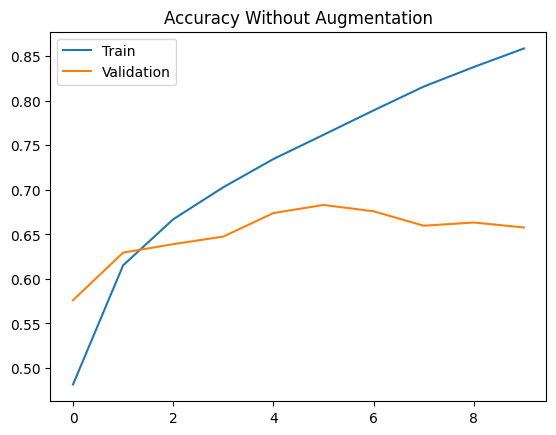

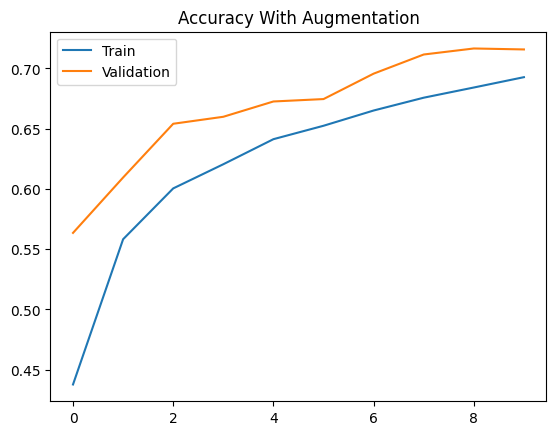

In [ ]:
import matplotlib.pyplot as plt

# Without Augmentation
plt.plot(train_noaug.history["accuracy"])
plt.plot(train_noaug.history["val_accuracy"])
plt.title("Accuracy Without Augmentation")
plt.legend(["Train", "Validation"])
plt.show()

# With Augmentation
plt.plot(train_aug.history["accuracy"])
plt.plot(train_aug.history["val_accuracy"])
plt.title("Accuracy With Augmentation")
plt.legend(["Train", "Validation"])
plt.show()

#### Task 3


In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_dir = "fruits360/fruits360_filtered/Training"
test_dir = "fruits360/fruits360_filtered/Test"

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0 / 255)
test_gen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

test_data = train_gen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 11398 images belonging to 120 classes.
Found 4752 images belonging to 120 classes.


In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

In [ ]:
model = tf.keras.Sequential(
    [
        base_model,
        layers.Flatten(),
        layers.Dense(1000, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(120, activation="softmax"),
    ]
)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data, verbose=2)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


KeyboardInterrupt: 

In [ ]:
loss, acc = model.evaluate(test_data)
print("Test Accuracy:", acc)

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training vs Validation Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Loss graph
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training vs Validation Loss")
plt.legend(["Train", "Validation"])
plt.show()